<a href="https://colab.research.google.com/github/ninadcpa/dsc530/blob/main/Week10_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10 - Exercise 12.1 and 12.2

@Author - Ninad Patkhedkar

In [1]:
from google.colab import drive
import sys
import os

# This code is to just use code checked out from github on google drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ThinkStats/ThinkStats2/code/')
os.chdir('/content/drive/MyDrive/Colab Notebooks/ThinkStats/ThinkStats2/code/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Exercise 1**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.
Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of RunLinearModel that runs that quadratic model, but after that you should be able to reuse code in timeseries.py to generate predictions.

In [2]:
from __future__ import print_function, division
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas
import numpy as np
import statsmodels.formula.api as smf

import thinkplot
import thinkstats2
import regression
import timeseries
import matplotlib.pyplot as plt


In [3]:
def RunQuadraticModel(daily):
    """Runs a linear model of prices versus years.
    daily: DataFrame of daily prices
    returns: model, results
    """
    daily['years2'] = daily.years**2
    model = smf.ols('ppg ~ years + years2', data=daily)
    results = model.fit()
    return model, results


def PlotQuadraticModelFittedValues(daily, name):
    """
    """
    model, results = RunQuadraticModel(daily)
    regression.SummarizeResults(results)
    timeseries.PlotFittedValues(model, results, label=name)
    thinkplot.Config(root='timeseries11',
                   title='fitted values',
                   xlabel='years',
                   xlim=[-0.1, 3.8],
                   ylabel='price per gram ($)')
   
def PlotQuadraticModelResiduals(daily, name):
    """
    """
    model, results = RunQuadraticModel(daily)
    timeseries.PlotResidualPercentiles(model, results)
    thinkplot.Config(root='timeseries12',
                   title='residuals',
                   xlabel='years',
                   ylabel='price per gram ($)')
  
def PlotQuadraticModelPredictions(daily, name):
   
    model, results = RunQuadraticModel(daily)
    years = np.linspace(0, 5, 101)
    thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
    timeseries.PlotPredictions(daily, years, func=RunQuadraticModel)
    thinkplot.Config(root='timeseries13',
                   title='predictions',
                   xlabel='years',
                   xlim=[years[0]-0.1, years[-1]+0.1],
                   ylabel='price per gram ($)')
   

In [4]:
transactions = timeseries.ReadData()
dailies = timeseries.GroupByQualityAndDay(transactions)
name = 'high'
daily = dailies[name]

Intercept   13.7   (0)
years   -1.12   (5.86e-38)
years2   0.113   (4.82e-07)
R^2 0.4553
Std(ys) 1.096
Std(res) 0.809


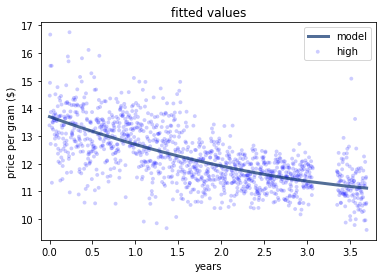

In [6]:
 PlotQuadraticModelFittedValues(daily, name)

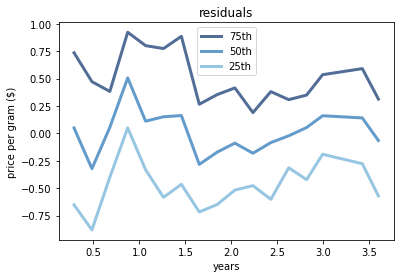

In [7]:
PlotQuadraticModelResiduals(daily, name)

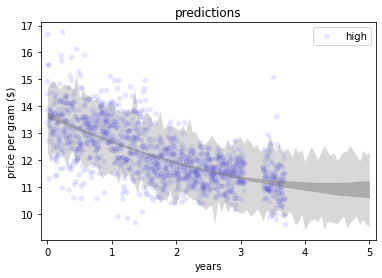

In [8]:
PlotQuadraticModelPredictions(daily, name)

**Exercise-2**  Write a definition for a class named SerialCorrelationTest that extends HypothesisTest from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.
Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [9]:
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.
        data: tuple of xs and ys
        """
        series, lag = data
        test_stat = abs(thinkstats2.SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.
        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

def TestSerialCorr(daily):
    """Tests serial correlations in daily prices and their residuals.
    daily: DataFrame of daily prices
    """
    # test the correlation between consecutive prices
    series = daily.ppg
    test = SerialCorrelationTest((series, 1))
    pvalue = test.PValue()
    print(test.actual, pvalue)

    # test for serial correlation in residuals of the linear model
    _, results = timeseries.RunLinearModel(daily)
    series = results.resid
    test = SerialCorrelationTest((series, 1))
    pvalue = test.PValue()
    print(test.actual, pvalue)

    # test for serial correlation in residuals of the quadratic model
    _, results = RunQuadraticModel(daily)
    series = results.resid
    test = SerialCorrelationTest((series, 1))
    pvalue = test.PValue()
    print(test.actual, pvalue)

In [10]:
TestSerialCorr(daily)

0.4852293761947381 0.0
0.07570473767506261 0.004
0.05607308161289912 0.058
